<a href="https://colab.research.google.com/github/Voztok94/ElbowMethod/blob/main/Elbow_Method_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.datasets import fetch_openml

In [2]:
# Load the dataset
iris = load_iris()
X = iris.data

In [3]:
# List to hold the sum of squared distances
sum_of_squared_distances = []

In [4]:
# Range of k values to test
K = range (1, 11)

In [5]:
# Perform k-means clustering for different k values and calculate the sum of squared distances
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X)
    sum_of_squared_distances.append(kmeans.inertia_)

In [6]:
# Load EMNIST dataset (letters and digits)
emnist = fetch_openml('emnist_balanced', version=1, return_X_y=True, parser='auto')
X_emnist, y_emnist = emnist

In [13]:
# Function to extract images of specific characters
def get_emnist_image(character, X_emnist, y_emnist):
    # Mapping character to the label in EMNIST dataset
    label_map = {
        'H': 17,  # EMNIST uses 0-25 for uppercase A-Z
        'W': 22,  # W is the 23rd letter in the alphabet (0-indexed)
        '5': 5    # 5 is used as the digit label
    }
    label = label_map[character]
    # Get the first instance of the specified character
    indices = np.where(y_emnist == str(label))[0]
    # Use .iloc to access row by integer index
    image = X_emnist.iloc[indices[0]].values.reshape(28, 28)

    # Rotate and flip the image to correct orientation
    image = np.rot90(image, -1)  # Rotate 90 degrees counterclockwise
    return image

# Extract images for "H", "W", and "5"
image_H = get_emnist_image('H', X_emnist, y_emnist)
image_W = get_emnist_image('W', X_emnist, y_emnist)
image_5 = get_emnist_image('5', X_emnist, y_emnist)

# Flip the '5' image to correct inversion
image_5 = np.fliplr(image_5)

# Flip the 'W' image upside down to correct its orientation
image_W = np.flipud(image_W)

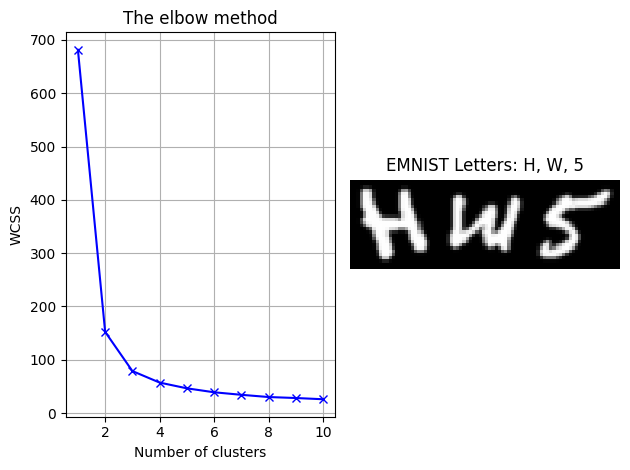

In [14]:
# Plot the elbow method results
plt.subplot(1, 2, 1)  # 1 row, 2 columns, first subplot
plt.plot(K, sum_of_squared_distances, 'bx-')  # Elbow method
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.title('The elbow method')
plt.grid(True)

# Plot the EMNIST letters
plt.subplot(1, 2, 2)  # 1 row, 2 columns, second subplot
plt.imshow(np.hstack([image_H, image_W, image_5]), cmap='gray')
plt.title('EMNIST Letters: H, W, 5')
plt.axis('off')

# Show the plots
plt.tight_layout()
plt.show()


In [ ]:
import time
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [ ]:
# Load MNIST dataset
mnist = fetch_openml('mnist_784', version=1, return_X_y=True, parser='auto')
# Unpack the tuple into X and y
X, y = mnist

In [ ]:
# Split the dataset into training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Apply StandardScaler to normalize the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
# Logistic regression without PCA
start_time_no_pca = time.time()

logisticRegr_no_pca = LogisticRegression(solver='lbfgs', max_iter=1000, multi_class='auto')
logisticRegr_no_pca.fit(X_train_scaled, y_train)
y_pred_no_pca = logisticRegr_no_pca.predict(X_test_scaled)
accuracy_no_pca = accuracy_score(y_test, y_pred_no_pca)

end_time_no_pca = time.time()
time_no_pca = end_time_no_pca - start_time_no_pca

In [ ]:
# Apply PCA (retain 95% of variance)
pca = PCA(n_components=0.95)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

In [ ]:
# Logistic regression with PCA
start_time_pca = time.time()

logisticRegr_pca = LogisticRegression(solver='lbfgs', max_iter=1000, multi_class='auto')
logisticRegr_pca.fit(X_train_pca, y_train)
y_pred_pca = logisticRegr_pca.predict(X_test_pca)
accuracy_pca = accuracy_score(y_test, y_pred_pca)

end_time_pca = time.time()
time_pca = end_time_pca - start_time_pca

In [ ]:
# Results: time and accuracy with and without PCA
(time_no_pca, accuracy_no_pca, time_pca, accuracy_pca)